In [1]:
import os
from pySMOKEPostProcessor import pySMOKEpostprocessor
import matplotlib.pyplot as plt

In [2]:
kineticFolder = os.path.join("data", "ROPA-01", "kinetics")
resultsFolder = os.path.join("data", "ROPA-01", "Output")

pp = pySMOKEpostprocessor.pySMOKEpostprocessor(kinetic_mechanism = kineticFolder, 
                                     results_folder = resultsFolder, 
                                     verbose=True)

ROPA available
Computational domain: 
 * Lower Bound: 0.0   Upper Bound: 0.006516
 * Middle value: 0.003258
Available quantities for the abscissae variable:
 * time [s]
 * temperature [K]
 * pressure [Pa]
 * mol-weight [kg/kmol]
 * density [kg/m3]
 * heat-release [W/m3]
 * conversion-H2
 * conversion-O2
 * conversion-N2
 * All the mass fraction of the species inside the scheme (e.g. H2 or O2)


**Formation Rates**: function that returns the formation rate in [kmol/m3/s] or [kg/m3/s] of a specific species.
   > * `abscissae_name` ( *string* ): name of the abscissae for which is desired the plot of the reaction rate.
   > * `specie` ( *string* ): specie for which is desired the formation rate.
   > * `units` ( *string* ): specify the unit of measurement for which is required the formation rate. Types are **mass** ([kg/m3/s]) and **moles** ([kmol/m3/s]).
   > * `formation_rate_type` ( *string* ): Which kind of formation rate is required available type are **net**, **production** (only the production rate is computed and is strictly positive), **destruction** (only the destruction rate is computed and is strictly positive), **characteristic-time** which is calculated for the slected species as the ratio between the concentration and the destruction rate

In [3]:
abscissae, formation_rate = pp.FormationRates(abscissae_name = 'temperature', 
                                             specie = 'H2',
                                             units = 'mole',
                                             formation_rate_type = 'destruction')

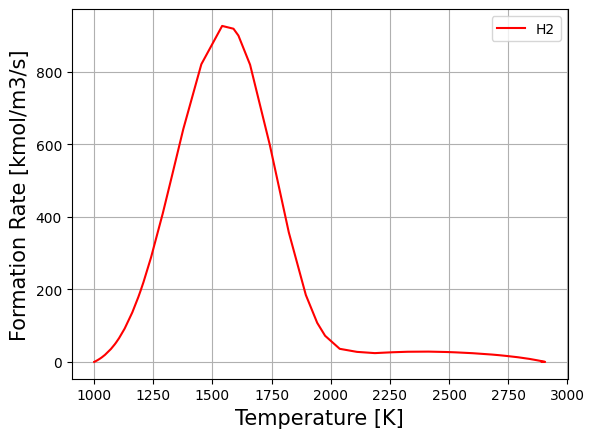

In [4]:
plt.plot(abscissae, formation_rate, 'r', label = 'H2')
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel('Formation Rate [kmol/m3/s]', fontsize=15)
plt.legend()
plt.grid()

In [5]:
abscissae, formation_rate_H2 = pp.FormationRates(abscissae_name = 'temperature', 
                                                 specie = 'H2',
                                                 units = 'mass',
                                                 formation_rate_type = 'net')
abscissae, formation_rate_H2O = pp.FormationRates(abscissae_name = 'temperature', 
                                                  specie = 'H2O',
                                                  units = 'mass',
                                                  formation_rate_type = 'net')

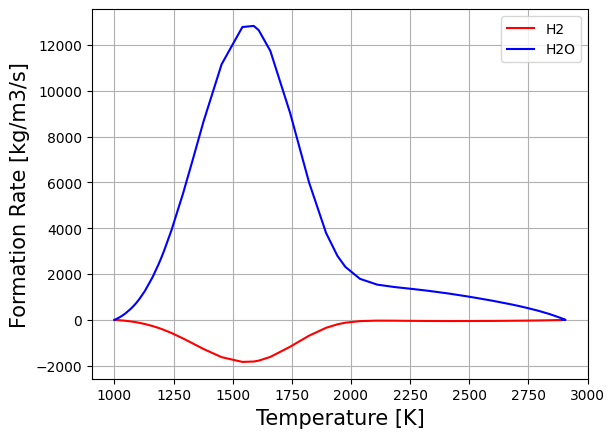

In [6]:
plt.plot(abscissae, formation_rate_H2, 'r', label = 'H2')
plt.plot(abscissae, formation_rate_H2O, 'b', label = 'H2O')
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel('Formation Rate [kg/m3/s]', fontsize=15)
plt.legend()
plt.grid()

In [7]:
abscissae, char_time_CO2 = pp.FormationRates(abscissae_name = 'temperature', 
                                             specie = 'CO2',
                                             units = 'mole',
                                             formation_rate_type = 'characteristic-time')

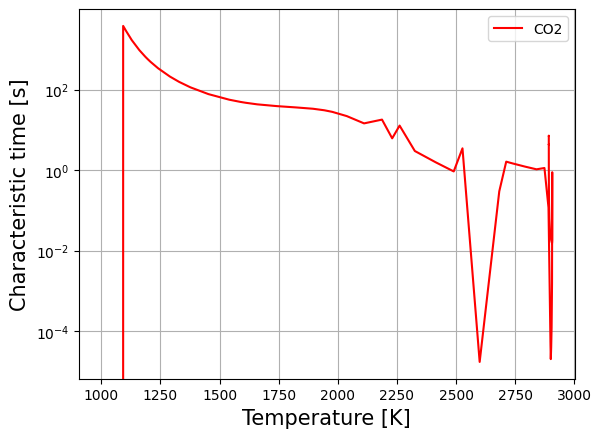

In [8]:
plt.plot(abscissae, char_time_CO2, 'r', label = 'CO2')
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel('Characteristic time [s]', fontsize=15)
plt.yscale('log')
plt.legend()
plt.grid()